In [1]:
import sys
import os
import pickle
import argparse
import pandas as pd
from sklearn.ensemble.forest import ExtraTreesRegressor

from fqi.et_tuning import run_tuning
from fqi.reward_function import *
from fqi.sars_creator import to_SARS
from fqi.utils import *

from trlib.policies.valuebased import ValueBased, EpsilonGreedy, Softmax
from trlib.policies.qfunction import ZeroQ
from trlib.algorithms.reinforcement.fqi_driver import FQIDriver, DoubleFQIDriver
from trlib.environments.trackEnv import TrackEnv
from trlib.utilities.ActionDispatcher import *
import matplotlib.pyplot as plt

## Compare Qs at different iterations

In [2]:
track_file_name = 'dataset_compare_Q'
rt_file_name = 'ref_traj'
data_path = './trajectory/'
simulations = pd.read_csv(os.path.join(data_path, track_file_name + '.csv'),
                              dtype={'isReference': bool, 'is_partial':bool})
ref_tr = pd.read_csv(os.path.join(data_path, rt_file_name + '.csv'))

In [3]:
np.unique(simulations.NLap).item(-1)
m = []
for i in range(0, int(np.unique(simulations.NLap).item(-1)-7), 7):
    laps10 = simulations[(simulations.NLap > i) & (simulations.NLap <= i+7)]
    m.append(np.mean(laps10.NLap.value_counts()))

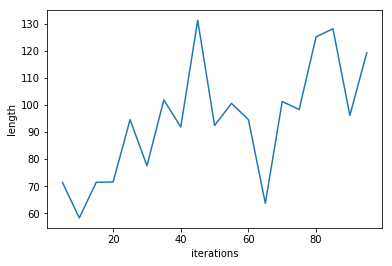

In [4]:
#%matplotlib notebook
#import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set_ylabel('length')
ax.set_xlabel('iterations')
ax.plot(list(range(5, len(m)*5+1, 5)) , m)

### Boxplot

In [5]:
m = []
for i in range(0, int(np.unique(simulations.NLap).item(-1)-7), 7):
    laps7 = simulations[(simulations.NLap > i) & (simulations.NLap <= i+7)]
    m.append(laps7.NLap.value_counts().values)

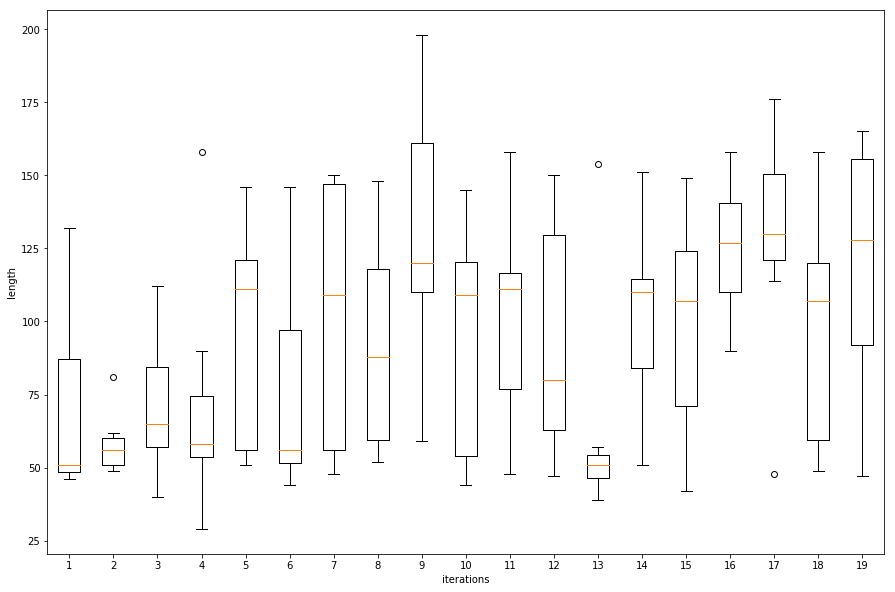

In [8]:
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)
ax.set_ylabel('length')
ax.set_xlabel('iterations')
#ax.boxplot(m, positions = list(range(5, len(m)*5+1, 5)));
ax.boxplot(m);

